### Data Collection

In [60]:
# Import Libraries
import cv2
import numpy as np
import os
import time
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline

In [79]:
DATASET_PATH = './/data'
#DATASET_PATH = '/content/drive/MyDrive/dataset'
labels = ["no-gesture", "play-n-Stop", "mute", "loop", "shortcuts", "screenSize", "subtitles", "next", "previous", "forward", "backward", "faster", "slower", "volume-up", "volume-down"]

In [62]:
print(DATASET_PATH)

.//data


### Create the directory structure

In [64]:
def setDataDir(DATASET_PATH):
    if not os.path.exists(DATASET_PATH):
        os.makedirs(DATASET_PATH)

    if not os.path.exists(DATASET_PATH +'//train'):
        os.makedirs(DATASET_PATH +'//train')

    if not os.path.exists(DATASET_PATH +'//test'):
        os.makedirs(DATASET_PATH +'//test')
    
    for label in labels:
        if not os.path.exists(DATASET_PATH +'//train//' + label):
            os.makedirs(DATASET_PATH +'//train//' + label)
    
    for label in labels:
        if not os.path.exists(DATASET_PATH +'//test//' + label):
            os.makedirs(DATASET_PATH +'//test//' + label)

In [65]:
setDataDir(DATASET_PATH)
'''
setDataDir('.//data_gray')
setDataDir('.//data_thresh')
setDataDir('.//data_morph')
'''

"\nsetDataDir('.//data_gray')\nsetDataDir('.//data_thresh')\nsetDataDir('.//data_morph')\n"

In [66]:
os.listdir(DATASET_PATH)

['test', 'train']

In [67]:
os.listdir(DATASET_PATH+'//train')

['backward',
 'faster',
 'forward',
 'loop',
 'mute',
 'next',
 'no-gesture',
 'play-n-Stop',
 'previous',
 'screenSize',
 'shortcuts',
 'slower',
 'subtitles',
 'volume-down',
 'volume-up']

In [68]:
os.listdir(DATASET_PATH+'//test')

['backward',
 'faster',
 'forward',
 'loop',
 'mute',
 'next',
 'no-gesture',
 'play-n-Stop',
 'previous',
 'screenSize',
 'shortcuts',
 'slower',
 'subtitles',
 'volume-down',
 'volume-up']

### Enter Mode - Train or Test

In [69]:
print('Enter mode: (train/test)')
mode = input()

Enter mode: (train/test)
train


In [80]:
if (mode == 'train') or (mode == 'test'):
    directory = DATASET_PATH+'//'+mode
else:
    mode = input()

### Capture images for Dataset

In [81]:
print(directory)

.//data//train


In [72]:
def captureData(data_path, mode, data_size):
    cap = cv2.VideoCapture(0)
    
    if not cap.isOpened():
        print("Cannot open camera")
        exit()
    
    for label in labels:
        print('Images for {} :'.format(label))
        time.sleep(8)
        for img_count in range (data_size):
            ret, frame = cap.read()
            if not ret:
                print("Can't receive frame (stream end?). Exiting ...")
                break

            frame = cv2.flip(frame, 1)

            imgname = data_path+'//'+mode+'//'+label+'//'+label+('_{}.jpg'.format(str(img_count)))
            '''
            imgname_gray = data_path+'//'+mode+'//'+label+'//'+label+('_{}.jpg'.format(str(img_count)))
            imgname_thresh = data_path+'//'+mode+'//'+label+'//'+label+('_{}.jpg'.format(str(img_count)))
            imgname_morph = data_path+'//'+mode+'//'+label+'//'+label+('_{}.jpg'.format(str(img_count)))
            '''

            x1 = int(0.5* (frame.shape[1]))
            y1 = 10
            x2 = frame.shape[1]-10
            y2 = int(0.5*frame.shape[1])

            cv2.rectangle(frame, (x1-1, y1-1), (x2+1, y2+1), (0,0,0), 3)
            cv2.imshow("Collecting Data", frame)

            # frame extraction
            roi = frame[y1:y2, x1:x2]
            roi = cv2.resize(roi, (128, 128))

            gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
            thresh = cv2.threshold(gray, 135, 255, cv2.THRESH_BINARY)[1]
            
            
            cv2.imwrite(imgname, thresh)
            cv2.imshow('ROI', thresh)
            
            '''
            kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
            morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
            '''

            '''
            cv2.imwrite(imgname, roi)
            cv2.imshow('ROI', roi)
            cv2.imwrite(imgname_gray, gray)
            cv2.imshow('ROI_gray', gray)
            cv2.imwrite(imgname_thresh, thresh)
            cv2.imshow('ROI_thresh', thresh)
            cv2.imwrite(imgname_morph, morph)
            cv2.imshow('ROI_morph', morph)
            '''

            print('Collecting image {} {}'.format(label, img_count))
            time.sleep(0.3)
        print("click")

        if cv2.waitKey(1) == ord('q'):
            break
            
    cap.release()
    cv2.destroyAllWindows()

In [13]:
captureData(DATASET_PATH, mode, 30)

Images for no-gesture :
click
Images for play-n-Stop :
click
Images for mute :
click
Images for loop :
click
Images for shortcuts :
click
Images for screenSize :
click
Images for subtitles :
click
Images for next :
click
Images for previous :
click
Images for forward :


click
Images for backward :
click
Images for faster :
click
Images for slower :
click
Images for volume-up :
click
Images for volume-down :
click


In [73]:
def dataCount(mode):
    count = dict()
    for lbl in labels:
        count[lbl] = len(os.listdir('.//data//'+mode+'//'+lbl))
        print(('.//data//'+mode+'//'+lbl), " ", count[lbl])

In [74]:
dataCount('train')

.//data//train//no-gesture   90
.//data//train//play-n-Stop   89
.//data//train//mute   89
.//data//train//loop   88
.//data//train//shortcuts   89
.//data//train//screenSize   87
.//data//train//subtitles   85
.//data//train//next   99
.//data//train//previous   88
.//data//train//forward   87
.//data//train//backward   97
.//data//train//faster   84
.//data//train//slower   85
.//data//train//volume-up   88
.//data//train//volume-down   85


In [75]:
dataCount('test')

.//data//test//no-gesture   49
.//data//test//play-n-Stop   49
.//data//test//mute   42
.//data//test//loop   35
.//data//test//shortcuts   45
.//data//test//screenSize   45
.//data//test//subtitles   45
.//data//test//next   42
.//data//test//previous   45
.//data//test//forward   42
.//data//test//backward   36
.//data//test//faster   38
.//data//test//slower   54
.//data//test//volume-up   54
.//data//test//volume-down   54


### Gestures in Dataset

In [82]:
'''DATASET_PATH = './/data_thresh//'
directory = './/data_thresh//'+mode
print(directory)'''

"DATASET_PATH = './/data_thresh//'\ndirectory = './/data_thresh//'+mode\nprint(directory)"

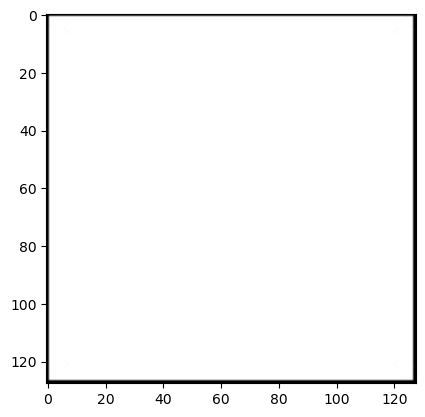

In [83]:
img = Image.open(directory+'//no-gesture//no-gesture_0.jpg')
plt.imshow(img, cmap='gray')

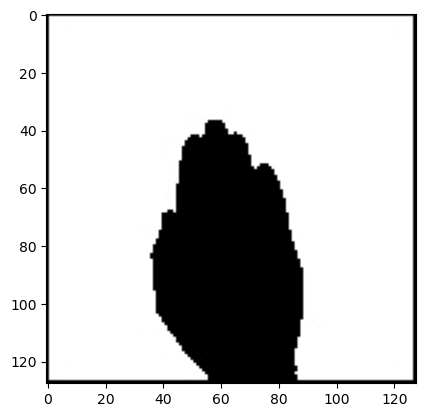

In [84]:
img = Image.open(directory+'//play-n-Stop//play-n-Stop_0.jpg')
plt.imshow(img, cmap='gray')

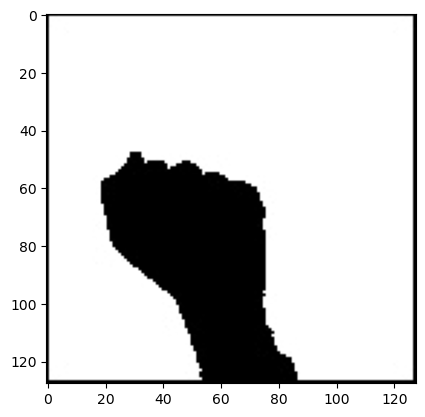

In [85]:
img = Image.open(directory+'//mute//mute_0.jpg')
plt.imshow(img, cmap='gray')

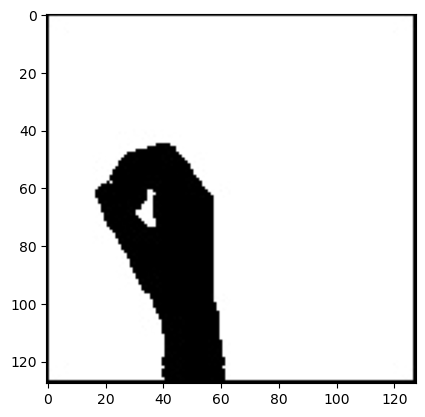

In [86]:
img = Image.open(directory+'//loop//loop_0.jpg')
plt.imshow(img, cmap='gray')

## 2.Training CNN model

### Import of keras model and hidden layers for our convolutional network

In [106]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout

### Building the CNN

In [142]:
def buildModel():

    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))

    model.add(Flatten())

    model.add(Dense(256, activation='relu'))
    model.add(Dense(15, activation='softmax'))

    return model

In [143]:
model = buildModel()

In [144]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Preparing the train/test data and training the model

In [145]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.1)

test_datagen = ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.1)

training_set = train_datagen.flow_from_directory(DATASET_PATH +'//train',
                                                 target_size=(128, 128),
                                                 batch_size=5,
                                                 color_mode='grayscale',
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory(DATASET_PATH +'//test',
                                            target_size=(128, 128),
                                            batch_size=5,
                                            color_mode='grayscale',
                                            class_mode='categorical')

Found 1330 images belonging to 15 classes.
Found 675 images belonging to 15 classes.


In [159]:
history = model.fit(
    training_set,
    steps_per_epoch=80,
    epochs=5,
    validation_data=test_set,
    validation_steps=30)

Epoch 1/5
80/80 [==============================] - 7s 91ms/step - loss: 0.0288 - accuracy: 0.9900 - val_loss: 1.2128 - val_accuracy: 0.7600
Epoch 2/5
80/80 [==============================] - 6s 78ms/step - loss: 0.0742 - accuracy: 0.9800 - val_loss: 1.1367 - val_accuracy: 0.7400
Epoch 3/5
80/80 [==============================] - 6s 77ms/step - loss: 0.0569 - accuracy: 0.9875 - val_loss: 1.1239 - val_accuracy: 0.7867
Epoch 4/5
80/80 [==============================] - 6s 79ms/step - loss: 0.0115 - accuracy: 0.9950 - val_loss: 1.2537 - val_accuracy: 0.7533
Epoch 5/5
80/80 [==============================] - 6s 75ms/step - loss: 0.0141 - accuracy: 0.9925 - val_loss: 1.3142 - val_accuracy: 0.7533


### Train accuracy

In [153]:
train_loss, train_acc = model.evaluate(training_set)

print('Train accuracy: {:2.2f}%'.format(train_acc*100))

266/266 [==============================] - 8s 30ms/step - loss: 0.0662 - accuracy: 0.9782
Train accuracy: 97.82%


### Test accuracy

In [154]:
test_loss, test_acc = model.evaluate(test_set)

print('Test accuracy: {:2.2f}%'.format(test_acc*100))

135/135 [==============================] - 3s 22ms/step - loss: 1.4622 - accuracy: 0.7215
Test accuracy: 72.15%


### Save entire model to a HDF5 file

In [155]:
model.save('handrecognition_model.hdf5')
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 14, 14, 128)    

### Result Analysis

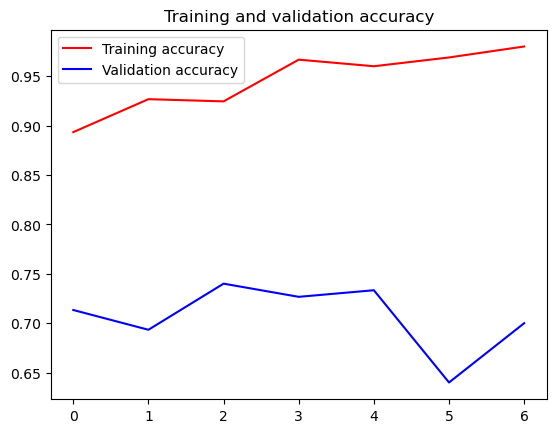

<Figure size 640x480 with 0 Axes>

In [156]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()



plt.show()

<Figure size 640x480 with 0 Axes>

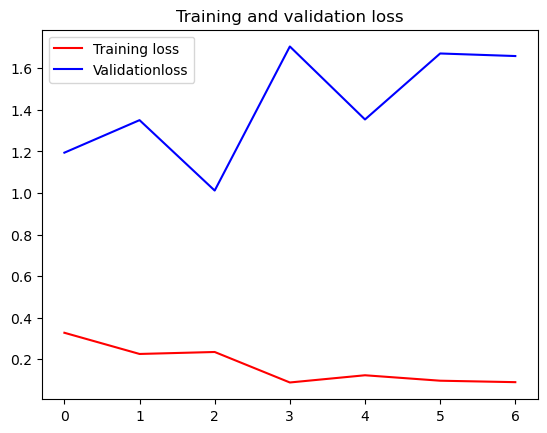

<Figure size 640x480 with 0 Axes>

In [157]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validationloss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

### Saving the model weights 

In [ ]:
model_json = model.to_json()
with open("gesture-model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights('gesture-model.h5')